In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random as rand


n = 100
lamb = 2
Cauch_0 = stats.cauchy.rvs(0,lamb,size = n)
Cauch_0.sort()
A_0 = Cauch_0[2]
B_0 = Cauch_0[-3]
W_0 = B_0 - A_0

In [2]:
scale = np.linspace(0.01,5.01,500)
L = np.zeros(500)
for i in range(500):
    pdf = stats.cauchy.pdf(Cauch_0,0,scale[i])
    L[i] = np.prod(pdf)
estymator = scale[np.argmax(L)]
estymator

2.665310621242485

In [3]:
dL = np.diff(np.log(L))
dx = np.diff(scale)
dLdx = dL/dx[0]
dL2 = np.diff(dLdx)
dL2d2x = dL2/dx[0]
niepewnosc = np.sqrt(-1/dL2d2x[np.argmax(L)]) 
niepewnosc

C:\Users\przem\AppData\Local\Temp\ipykernel_20024\3079644540.py:1: RuntimeWarning: divide by zero encountered in log
  dL = np.diff(np.log(L))


0.3823943245737906

In [4]:
import math as math

x1 = estymator - 2*niepewnosc
x2 = estymator + 2*niepewnosc
n = 100
M = 1000
alpha = 0.32
P1=[]
P2=[]


s = np.linspace(x1,x2,100) #krok niepewnosc/25 daje 100 wartosci miedzy x1 i x2
for lam in range(n):
    p1 = 0
    p2 = 0
    for monte in range(M):
        Cauch = stats.cauchy.rvs(0,s[lam],size = n)
        Cauch.sort()
        A = Cauch[2]
        B = Cauch[-3]
        W = B - A
        if W < W_0:
            p1 = p1+1
        else:
            p2 = p2+1
    P1.append(p1/M)
    P2.append(p2/M) 

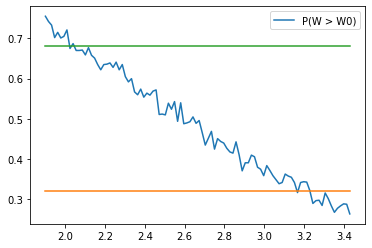

In [5]:

plt.plot(s, P1, label = 'P(W > W0)')
plt.plot(s, [alpha] * len(s))
plt.plot(s, [1 - alpha] * len(s))
plt.legend()
plt.show()


In [6]:
w_1 = None
w_2 = None

m_1 = None
m_2 = None

test = 0

for v in range(int(len(s)/2)):
    if w_1 == None and P1[v] <= 1 - alpha/2:
        w_1 = s[v]
        test += 1

    if m_1 == None and P1[n - v - 1] >= alpha/2:
        m_1 = s[n - v - 1]
        test += 1

    if w_2 == None and P2[v] <= alpha/2:
        w_2 = s[v]
        test += 1

    if m_2 == None and P2[n - v - 1] >= 1 - alpha/2:
        m_2 = s[n - v - 1]
        test += 1

    if test == 4:
        break

if w_1 == None:
    w_1 = estymator - 2 * niepewnosc

if m_1 == None:
    m_1 = estymator + 2 * niepewnosc

if w_2 == None:
    w_2 = estymator - 2 * niepewnosc

if m_2 == None:
    m_2 = estymator + 2 * niepewnosc

print('Estymator wartosci lambda policzony metoda najwiekszej wiarygodnosci wyniosl {0:1.2f} gdzie jego prawdziwa wartosc to {1:1.0f}, a jego dolne ograniczenie niepewnosci to {2:1.2f}.'.format(estymator, lamb, niepewnosc))
print('Referencyjna wartosc roznic wyniosla W0 = {0:4.2f}\n'.format(W_0))

print('Przedzial ufnosci (1 - alfa = {0:1.2f}), dla estymatora wartosci lambda:'.format(1-alpha))
print('Dla W > W0 wynosi [{0:4.2f}, {1:4.2f}]'.format(w_1, m_1))      


Estymator wartosci lambda policzony metoda najwiekszej wiarygodnosci wyniosl 2.67 gdzie jego prawdziwa wartosc to 2, a jego dolne ograniczenie niepewnosci to 0.38.
Referencyjna wartosc roznic wyniosla W0 = 69.04

Przedzial ufnosci (1 - alfa = 0.68), dla estymatora wartosci lambda:
Dla W > W0 wynosi [1.90, 3.43]
